# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [64]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [65]:
# 检查数据维度
data.shape

(112915, 11)

In [66]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [67]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [68]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [69]:
# 提示：查看train_test_split函数
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, 
                                               test_size=.25, 
                                               shuffle=True, 
                                               random_state=np.random.seed(1234))
x_train.shape

(81486, 10)

0    101322
1      7326
Name: SeriousDlqin2yrs, dtype: int64


<AxesSubplot:>

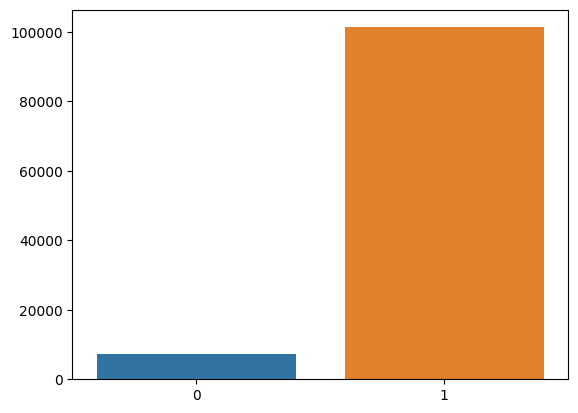

In [70]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
print(data['SeriousDlqin2yrs'].value_counts())

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
num_0,num_1=data['SeriousDlqin2yrs'].value_counts()
sns.barplot(data,y=[num_0,num_1],x=data['SeriousDlqin2yrs'].unique())


#### 2.数据预处理之离散化

RevolvingUtilizationOfUnsecuredLines     float64
age                                      float64
NumberOfTime30-59DaysPastDueNotWorse     float64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans          float64
NumberOfTimes90DaysLate                  float64
NumberRealEstateLoansOrLines             float64
NumberOfTime60-89DaysPastDueNotWorse     float64
NumberOfDependents                       float64
age_label                               category
dtype: object

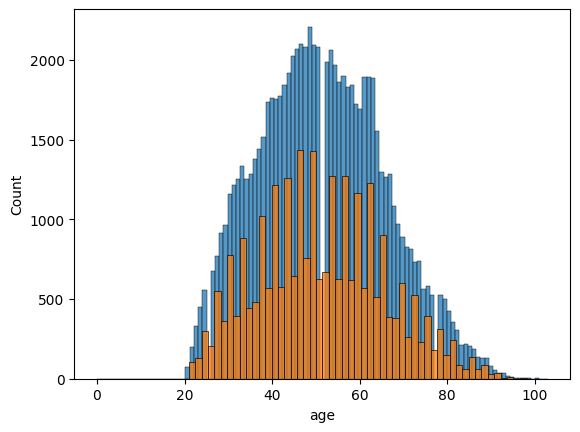

In [71]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
#画出分布情况
sns.histplot(x_train['age'],bins='auto')
sns.histplot(x_test['age'],bins='auto')
#计算边界
low=data['age'].min()
upp=data['age'].max()
block=np.arange(low,upp,3,dtype=np.int8)
#进行分桶
x_train['age_label']=pd.cut(x_train['age'],bins=block)
x_test['age_label']=pd.cut(x_test['age'],bins=block)
x_test.dtypes

#### 3.数据预处理之独热向量编码

In [77]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
#这里一开始把年龄段并入原始数据，由于年龄就是一个很好特征，第二遍跑就没把它扔进去，若想并入对应把下面注释去掉并把最后两行注释掉。
#对age_label列进行独热向量编码
age_label_vt=pd.get_dummies(x_train['age_label'], columns=x_train['age_label'].unique())
#合并到原来数据集中
#x_train=pd.concat([x_train,age_label_vt],axis=1)
#x_train=x_train.drop(['age_label','age'],axis=1)
print(x_train.shape)
#对测试集同样操作
age_label_vt=pd.get_dummies(x_test['age_label'], columns=x_test['age_label'].unique())
age_label_vt.head()
#x_test=pd.concat([x_test,age_label_vt],axis=1)
#x_test=x_test.drop(['age_label','age'],axis=1)
x_train=x_train.drop(['age_label'],axis=1)
x_test=x_test.drop(['age_label'],axis=1)

(81486, 10)


#### 4.数据预处理之幅度缩放

In [78]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)
x_train_std.shape

(81486, 9)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

[[-0.01389386  1.11481892  0.39271202 -0.18026142 -0.10258655  0.22288693
  -0.39130612 -1.20356629  0.14438634]]


<AxesSubplot:>

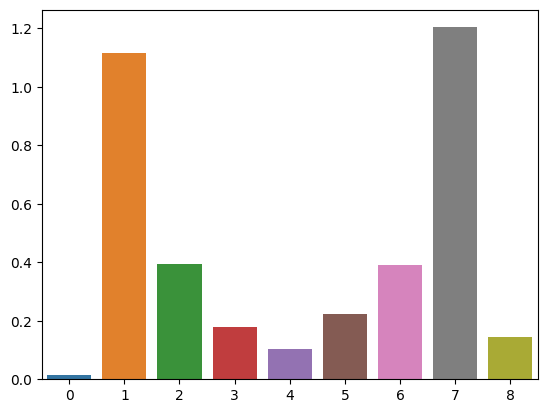

In [79]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
#logistic regression建模
LG=LogisticRegression(C=10.0, 
                       max_iter=10,
                       random_state=np.random.seed())
LG.fit(x_train_std,y_train)
#输出预测结果
y_LG_pred=LG.predict(x_test)

print(LG.coef_)
sns.barplot(x=np.arange(len(LG.coef_[0])),y=np.abs(LG.coef_[0]))

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [80]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
#准备网格字典
param_grid = {'C':[1,10,100,500],
              'penalty':['l1','l2']}

In [81]:
# 输出最好的超参数
# 输出最好的模型

#创建网格实例
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
grid.fit(x_train_std,y_train)
print("best cross-validation accuracy:", grid.best_score_)
print("test set score: ", grid.score(x_test_std, y_test))
print("best parameters: ", grid.best_params_)


best cross-validation accuracy: 0.9343445506974841
test set score:  0.9305279434504087
best parameters:  {'C': 10, 'penalty': 'l2'}


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

confusion_matrix: [[25238     1]
 [ 1923     0]]
test_Accuracy: 0.93
precision_score: 0.00
recall_score: 0.00
f1_value_score: 0.00
roc_auc_score: 0.50


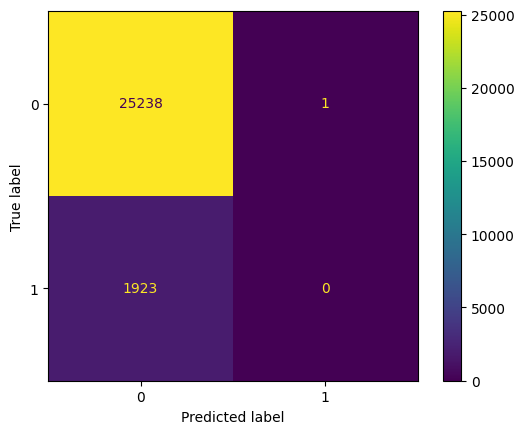

In [82]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score,accuracy_score,f1_score,roc_auc_score
#将上面得到的超参数代入重新训练模型
LG2=LogisticRegression(penalty='l2',
                       C=10.0, 
                       max_iter=10,
                       random_state=np.random.seed())
LG2.fit(x_train_std,y_train)
#输出预测结果
y_LG_pred=LG2.predict(x_test)
#计算混淆矩阵
cm = confusion_matrix(y_test, y_LG_pred , labels=LG.classes_)
#显示各种评估指标值
print(f'confusion_matrix: {cm}')
print(f'test_Accuracy: {accuracy_score(y_test, y_LG_pred):.2f}')
print(f'precision_score: {precision_score(y_test,y_LG_pred):.2f}')
print(f'recall_score: {recall_score(y_test, y_LG_pred):.2f}')
print(f'f1_value_score: {f1_score(y_test, y_LG_pred):.2f}')
print(f'roc_auc_score: {roc_auc_score(y_test, y_LG_pred):.2f}')
#可视化混淆矩阵
dis_LG = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=LG.classes_)
dis_LG.plot()

#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [83]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for th in thresholds:
    y_LG_pred=LG2.predict_proba(x_test)
    y_LG_pred=y_LG_pred>=th
    cm = confusion_matrix(y_test, y_LG_pred.argmax(axis=1), labels=LG.classes_)
    print(f'threshold={th}_test_Accuracy: {accuracy_score(y_test, y_LG_pred.argmax(axis=1)):.2f}')
    print(f'threshold={th}_confusion_matrix: {cm}')

threshold=0.1_test_Accuracy: 0.93
threshold=0.1_confusion_matrix: [[25238     1]
 [ 1923     0]]
threshold=0.2_test_Accuracy: 0.93
threshold=0.2_confusion_matrix: [[25238     1]
 [ 1923     0]]
threshold=0.3_test_Accuracy: 0.93
threshold=0.3_confusion_matrix: [[25238     1]
 [ 1923     0]]
threshold=0.4_test_Accuracy: 0.93
threshold=0.4_confusion_matrix: [[25238     1]
 [ 1923     0]]
threshold=0.5_test_Accuracy: 0.93
threshold=0.5_confusion_matrix: [[25238     1]
 [ 1923     0]]
threshold=0.6_test_Accuracy: 0.93
threshold=0.6_confusion_matrix: [[25238     1]
 [ 1923     0]]
threshold=0.7_test_Accuracy: 0.93
threshold=0.7_confusion_matrix: [[25238     1]
 [ 1923     0]]
threshold=0.8_test_Accuracy: 0.93
threshold=0.8_confusion_matrix: [[25238     1]
 [ 1923     0]]
threshold=0.9_test_Accuracy: 0.93
threshold=0.9_confusion_matrix: [[25238     1]
 [ 1923     0]]


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

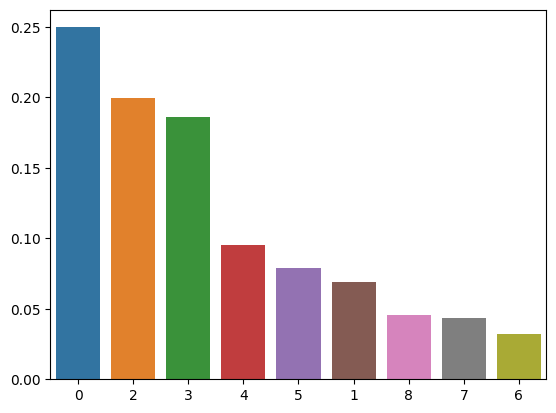

In [84]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)
forest.fit(x_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
x_label=[]
for i in range(len(indices)):
    x_label.append(str(indices[i]))

sns.barplot(x=x_label,y=np.sort(importances)[::-1])
selector = SelectFromModel(estimator=forest,prefit=True)
#print(selector.get_support())



confusion_matrix: [[24989   250]
 [ 1810   113]]
test_Accuracy: 0.92
precision_score: 0.31
recall_score: 0.06
f1_value_score: 0.10
roc_auc_score: 0.52


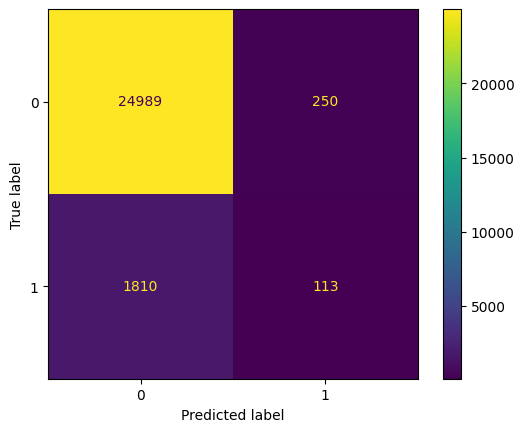

In [85]:
x_train2=x_train[:][x_train.keys()[selector.get_support().T]]
x_test2=x_test[:][x_test.keys()[selector.get_support().T]]
sc=StandardScaler()
sc.fit(x_train2)
x_train_std2=sc.transform(x_train2)
x_test_std2=sc.transform(x_test2)
forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)
forest.fit(x_train2, y_train)
y_forest_pred=forest.predict(x_test2)
#计算混淆矩阵
cm = confusion_matrix(y_test, y_forest_pred , labels=forest.classes_)

print(f'confusion_matrix: {cm}')
print(f'test_Accuracy: {accuracy_score(y_test, y_forest_pred):.2f}')
print(f'precision_score: {precision_score(y_test,y_forest_pred):.2f}')
print(f'recall_score: {recall_score(y_test, y_forest_pred):.2f}')
print(f'f1_value_score: {f1_score(y_test, y_forest_pred):.2f}')
print(f'roc_auc_score: {roc_auc_score(y_test, y_forest_pred):.2f}')
#可视化混淆矩阵
dis_LG = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=forest.classes_)
dis_LG.plot()

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

best cross-validation accuracy: 0.9365780687761559
test set score:  0.9324791988807893
best parameters:  {'RandomForest__max_depth': 7, 'RandomForest__n_estimators': 8}


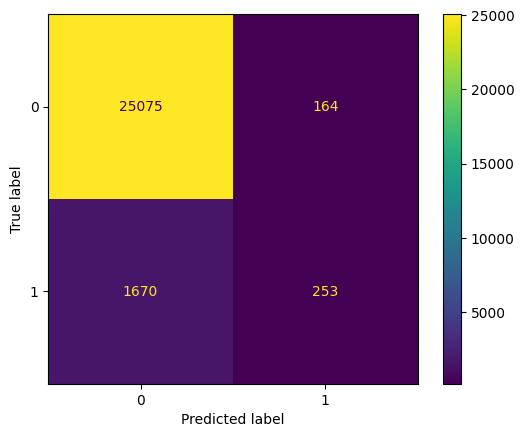

In [86]:
# 随机森林
#下面模型都没有剪特征
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

#用pipline将标准化操作与随机森林模型组合起来
pipe = Pipeline([("scaler", MinMaxScaler()), ("RandomForest", RandomForestClassifier())])
#给出网格交叉验证的超参数及它们的取值（由于时间关系，这里只简单计算了一下。）
param_grid = {'RandomForest__n_estimators': [7,8,9],'RandomForest__max_depth':[5,6,7]}
#网格搜索
grid2 = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid2.fit(x_train, y_train)
#给出预测
y_froest_pred=grid2.predict(x_test)
#求出混淆矩阵
cm2 = confusion_matrix(y_test, y_froest_pred )
dis_forest = ConfusionMatrixDisplay(confusion_matrix=cm2)
#显示具体参数
print("best cross-validation accuracy:", grid2.best_score_)
print("test set score: ", grid2.score(x_test, y_test))
print("best parameters: ", grid2.best_params_)
dis_forest.plot()

best cross-validation accuracy: 0.9317
test set score:  0.9306383918709963
best parameters:  {'svm__C': 100, 'svm__kernel': 'rbf'}


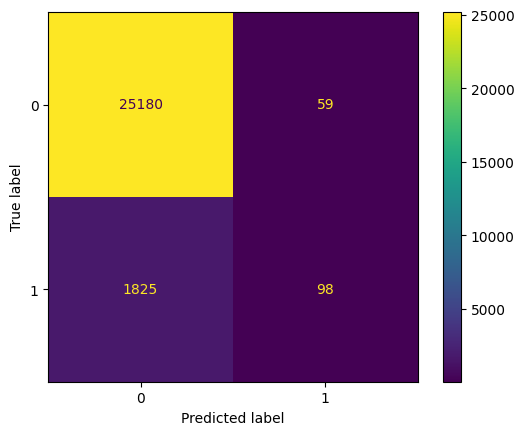

In [88]:

# 支持向量机
from sklearn.svm import SVC
#用pipline将标准化操作与支持向量机模型组合起来
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
#给出网格交叉验证的超参数及它们的取值
param_grid = {'svm__kernel': ['linear','rbf'],'svm__C':[0.1,1,10,100]}
#网格搜索
grid_svm = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_svm.fit(x_train[:10000], y_train[:10000])
#给出预测
y_svm_pred=grid_svm.predict(x_test)
#求出混淆矩阵
cm_svm = confusion_matrix(y_test, y_svm_pred)
dis_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
#显示具体参数
print("best cross-validation accuracy:", grid_svm.best_score_)
print("test set score: ", grid_svm.score(x_test, y_test))
print("best parameters: ", grid_svm.best_params_)
dis_svm.plot()


best cross-validation accuracy: 0.9305
test set score:  0.9290184817023783
best parameters:  {'knn__n_neighbors': 8, 'knn__p': 1}


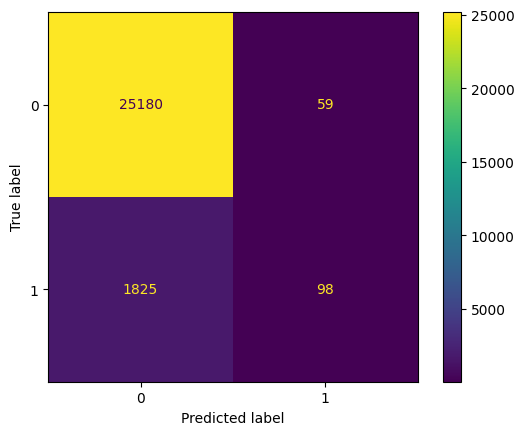

In [89]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
#用pipline将标准化操作与 K最近邻组合起来
pipe = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())])
#给出网格交叉验证的超参数及它们的取值
param_grid = {'knn__n_neighbors': [5,6,7,8],'knn__p':[1,2,3]}
#网格搜索
grid_knn = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_knn.fit(x_train[:10000], y_train[:10000])
#给出预测
y_knn_pred=grid_knn.predict(x_test)
#求出混淆矩阵
cm_knn = confusion_matrix(y_test, y_knn_pred)
dis_knn = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
#显示具体参数
print("best cross-validation accuracy:", grid_knn.best_score_)
print("test set score: ", grid_knn.score(x_test, y_test))
print("best parameters: ", grid_knn.best_params_)
dis_knn.plot()
